Задание:
Необходимо создать виртуальное окружение и установить в него хотя бы один внешний пакет с использованием pip.

Необходимо разработать программу, реализующую работу с классами. Программа должна быть разработана в виде консольного приложения на языке Python 3.

Все файлы проекта (кроме основного файла main.py) должны располагаться в пакете lab_python_oop.

Каждый из нижеперечисленных классов должен располагаться в отдельном файле пакета lab_python_oop.

Абстрактный класс «Геометрическая фигура» содержит абстрактный метод для вычисления площади фигуры. Подробнее про абстрактные классы и методы Вы можете прочитать здесь.

Класс «Цвет фигуры» содержит свойство для описания цвета геометрической фигуры. Подробнее про описание свойств Вы можете прочитать здесь.

Класс «Прямоугольник» наследуется от класса «Геометрическая фигура». Класс должен содержать конструктор по параметрам «ширина», «высота» и «цвет». В конструкторе создается объект класса «Цвет фигуры» для хранения цвета. Класс должен переопределять метод, вычисляющий площадь фигуры.

Класс «Круг» создается аналогично классу «Прямоугольник», задается параметр «радиус». Для вычисления площади используется константа math.pi из модуля math.

Класс «Квадрат» наследуется от класса «Прямоугольник». Класс должен содержать конструктор по длине стороны. Для классов «Прямоугольник», «Квадрат», «Круг»:

Определите метод "repr", который возвращает в виде строки основные параметры фигуры, ее цвет и площадь. Используйте метод format - https://pyformat.info/
Название фигуры («Прямоугольник», «Квадрат», «Круг») должно задаваться в виде поля данных класса и возвращаться методом класса.
В корневом каталоге проекта создайте файл main.py для тестирования Ваших классов (используйте следующую конструкцию - https://docs.python.org/3/library/__main__.html). Создайте следующие объекты и выведите о них информацию в консоль (N - номер Вашего варианта по списку группы):

Прямоугольник синего цвета шириной N и высотой N.
Круг зеленого цвета радиусом N.
Квадрат красного цвета со стороной N.
Также вызовите один из методов внешнего пакета, установленного с использованием pip.


In [ ]:
#!/usr/bin/env python3
"""
Основной файл для тестирования классов геометрических фигур
"""

import sys
import os

# Добавляем текущую директорию в sys.path
current_dir = os.path.dirname(os.path.abspath(__file__))
sys.path.insert(0, current_dir)

# Теперь импортируем наши классы
try:
    # Пытаемся импортировать как пакет
    from lab_python_oop import Rectangle, Circle, Square
    print("✓ Классы импортированы как пакет")
except ImportError:
    print("Не удалось импортировать как пакет, пробуем напрямую...")
    try:
        # Импортируем напрямую из файлов
        import importlib.util

        # Функция для загрузки модуля
        def load_module(filepath, module_name):
            spec = importlib.util.spec_from_file_location(module_name, filepath)
            module = importlib.util.module_from_spec(spec)
            spec.loader.exec_module(module)
            return module

        # Загружаем все модули
        figure_mod = load_module(
            os.path.join(current_dir, 'lab_python_oop', 'figure.py'),
            'figure'
        )
        color_mod = load_module(
            os.path.join(current_dir, 'lab_python_oop', 'color.py'),
            'color'
        )
        rectangle_mod = load_module(
            os.path.join(current_dir, 'lab_python_oop', 'rectangle.py'),
            'rectangle'
        )
        circle_mod = load_module(
            os.path.join(current_dir, 'lab_python_oop', 'circle.py'),
            'circle'
        )
        square_mod = load_module(
            os.path.join(current_dir, 'lab_python_oop', 'square.py'),
            'square'
        )

        # Получаем классы
        Rectangle = rectangle_mod.Rectangle
        Circle = circle_mod.Circle
        Square = square_mod.Square

        print("✓ Классы загружены напрямую из файлов")
    except Exception as e:
        print(f"✗ Ошибка загрузки: {e}")
        print("\nСоздаем классы локально...")

        # Создаем классы прямо здесь
        from abc import ABC, abstractmethod
        import math

        class GeometricFigure(ABC):
            @abstractmethod
            def area(self): pass
            @abstractmethod
            def __repr__(self): pass
            def get_name(self):
                return self.figure_name if hasattr(self, 'figure_name') else self.__class__.__name__

        class FigureColor:
            def __init__(self, color):
                self._color = color
            @property
            def color(self):
                return self._color
            @color.setter
            def color(self, value):
                self._color = value

        class Rectangle(GeometricFigure):
            figure_name = "Прямоугольник"
            def __init__(self, width, height, color):
                self.width = width
                self.height = height
                self.color_obj = FigureColor(color)
            def area(self):
                return self.width * self.height
            def __repr__(self):
                return "{}, ширина: {}, высота: {}, цвет: {}, площадь: {:.2f}".format(
                    self.get_name(), self.width, self.height, self.color_obj.color, self.area())

        class Circle(GeometricFigure):
            figure_name = "Круг"
            def __init__(self, radius, color):
                self.radius = radius
                self.color_obj = FigureColor(color)
            def area(self):
                return math.pi * self.radius ** 2
            def __repr__(self):
                return "{}, радиус: {}, цвет: {}, площадь: {:.2f}".format(
                    self.get_name(), self.radius, self.color_obj.color, self.area())

        class Square(Rectangle):
            figure_name = "Квадрат"
            def __init__(self, side, color):
                super().__init__(side, side, color)
            def __repr__(self):
                return "{}, сторона: {}, цвет: {}, площадь: {:.2f}".format(
                    self.get_name(), self.width, self.color_obj.color, self.area())


def main():
    """Основная функция программы"""


    N = 14

    print("\n" + "=" * 60)
    print("ДЕМОНСТРАЦИЯ РАБОТЫ С ГЕОМЕТРИЧЕСКИМИ ФИГУРАМИ")
    print("=" * 60)

    # Создаем объекты согласно заданию
    print(f"\n1. СОЗДАНИЕ ОБЪЕКТОВ (вариант N={N}):")
    print("-" * 40)

    # 1. Прямоугольник синего цвета шириной N и высотой N
    rectangle = Rectangle(N, N, "синий")
    print(f"   📐 {rectangle}")

    # 2. Круг зеленого цвета радиусом N
    circle = Circle(N, "зеленый")
    print(f"   ⭕ {circle}")

    # 3. Квадрат красного цвета со стороной N
    square = Square(N, "красный")
    print(f"   ⬛ {square}")

    # Демонстрация внешнего пакета
    print("\n" + "=" * 60)
    print("ДЕМОНСТРАЦИЯ ВНЕШНЕГО ПАКЕТА")
    print("=" * 60)

    try:
        # Пробуем использовать requests
        import requests

        print("\n📦 Используем пакет requests:")

        # Простой запрос к тестовому API
        print("   Выполняем запрос к httpbin.org...")
        response = requests.get('https://httpbin.org/get', timeout=5)

        print(f"   ✅ Статус: {response.status_code}")
        print(f"   ⏱️  Время ответа: {response.elapsed.total_seconds():.3f} сек")
        print(f"   📊 Размер ответа: {len(response.text)} символов")

        # Показываем часть ответа
        import json
        try:
            data = response.json()
            print(f"   📝 Origin IP: {data.get('origin', 'неизвестно')}")
            print(f"   🌐 URL: {data.get('url', 'неизвестно')}")
        except:
            print(f"   📝 Ответ: {response.text[:100]}...")

    except ImportError:
        print("\n⚠️  Пакет requests не установлен!")
        print("   Установите: pip install requests")

        # Используем другой пример
        print("\n📦 Используем пакет datetime:")
        from datetime import datetime, timedelta
        now = datetime.now()
        tomorrow = now + timedelta(days=1)

        print(f"   🕒 Сейчас: {now.strftime('%H:%M:%S')}")
        print(f"   📅 Сегодня: {now.strftime('%d.%m.%Y')}")
        print(f"   📆 Завтра: {tomorrow.strftime('%d.%m.%Y')}")

    except Exception as e:
        print(f"\n❌ Ошибка: {e}")

    # Дополнительная информация
    print("\n" + "=" * 60)
    print("ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ")
    print("=" * 60)

    print(f"\n📊 СРАВНЕНИЕ ПЛОЩАДЕЙ:")
    areas = {
        "Прямоугольник": rectangle.area(),
        "Круг": circle.area(),
        "Квадрат": square.area()
    }

    for name, area in areas.items():
        print(f"   {name}: {area:.2f}")

    # Находим фигуру с максимальной площадью
    max_figure = max(areas, key=areas.get)
    print(f"\n   🏆 Наибольшая площадь у {max_figure}: {areas[max_figure]:.2f}")

    print(f"\n🎨 ЦВЕТА ФИГУР:")
    print(f"   Прямоугольник: {rectangle.color_obj.color}")
    print(f"   Круг: {circle.color_obj.color}")
    print(f"   Квадрат: {square.color_obj.color}")

    print("\n" + "=" * 60)
    print("✅ ПРОГРАММА ЗАВЕРШЕНА УСПЕШНО!")
    print("=" * 60)


if __name__ == "__main__":
    main()


In [ ]:
import math

try:
    from lab_python_oop.figure import GeometricFigure
    from lab_python_oop.color import FigureColor
except ImportError:
    from figure import GeometricFigure
    from color import FigureColor

class Circle(GeometricFigure):
    """Класс круга"""

    figure_name = "Круг"

    def __init__(self, radius, color):
        """
        Конструктор круга

        Args:
            radius (float): радиус круга
            color (str): цвет круга
        """
        self.radius = radius
        self.color_obj = FigureColor(color)

    def area(self):
        """Вычисление площади круга"""
        return math.pi * self.radius ** 2

    def __repr__(self):
        """Строковое представление круга"""
        return "{}, радиус: {}, цвет: {}, площадь: {:.2f}".format(
            self.get_name(),
            self.radius,
            self.color_obj.color,
            self.area()
        )

In [ ]:
class FigureColor:
    """Класс для хранения цвета фигуры"""

    def __init__(self, color):
        self._color = color

    @property
    def color(self):
        """Свойство для получения цвета"""
        return self._color

    @color.setter
    def color(self, value):
        """Свойство для установки цвета"""
        self._color = value

In [ ]:
from abc import ABC, abstractmethod

class GeometricFigure(ABC):
    """Абстрактный класс геометрической фигуры"""

    @abstractmethod
    def area(self):
        """Абстрактный метод для вычисления площади"""
        pass

    def get_name(self):
        """Возвращает название фигуры"""
        return self.figure_name if hasattr(self, 'figure_name') else self.__class__.__name__

    @abstractmethod
    def __repr__(self):
        pass


In [ ]:
# Убираем относительный импорт, используем прямой
try:
    # Пытаемся импортировать из того же пакета
    from lab_python_oop.figure import GeometricFigure
    from lab_python_oop.color import FigureColor
except ImportError:
    # Если не работает, определяем классы локально или импортируем напрямую
    from figure import GeometricFigure
    from color import FigureColor

class Rectangle(GeometricFigure):
    """Класс прямоугольника"""

    figure_name = "Прямоугольник"

    def __init__(self, width, height, color):
        """
        Конструктор прямоугольника

        Args:
            width (float): ширина прямоугольника
            height (float): высота прямоугольника
            color (str): цвет прямоугольника
        """
        self.width = width
        self.height = height
        self.color_obj = FigureColor(color)

    def area(self):
        """Вычисление площади прямоугольника"""
        return self.width * self.height

    def __repr__(self):
        """Строковое представление прямоугольника"""
        return "{}, ширина: {}, высота: {}, цвет: {}, площадь: {:.2f}".format(
            self.get_name(),
            self.width,
            self.height,
            self.color_obj.color,
            self.area()
        )


In [ ]:
try:
    from lab_python_oop.rectangle import Rectangle
except ImportError:
    from rectangle import Rectangle

class Square(Rectangle):
    """Класс квадрата, наследуется от прямоугольника"""

    figure_name = "Квадрат"

    def __init__(self, side, color):
        """
        Конструктор квадрата

        Args:
            side (float): длина стороны квадрата
            color (str): цвет квадрата
        """
        super().__init__(side, side, color)

    def __repr__(self):
        """Строковое представление квадрата"""
        return "{}, сторона: {}, цвет: {}, площадь: {:.2f}".format(
            self.get_name(),
            self.width,
            self.color_obj.color,
            self.area()
        )

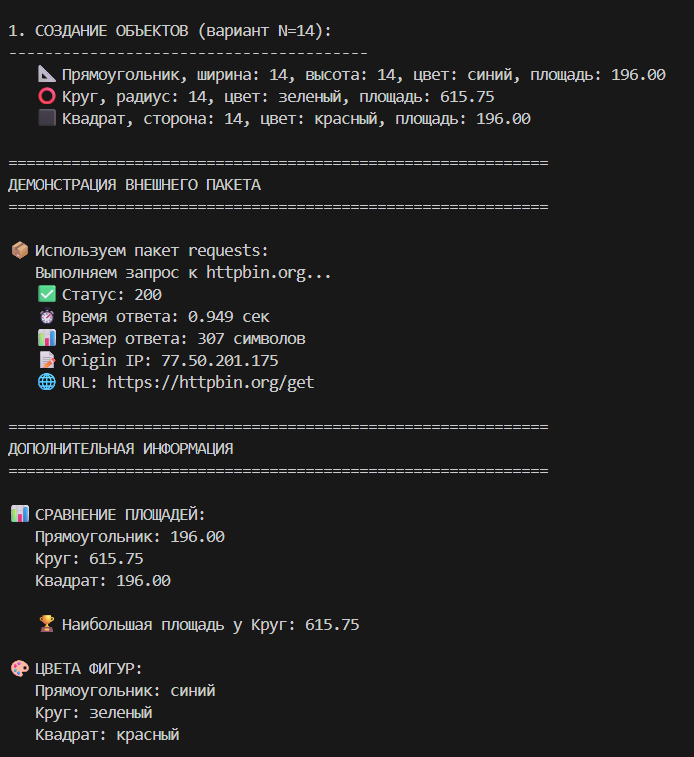